<a href="https://colab.research.google.com/github/inaianebarros/alura-store/blob/main/AluraStoreBr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importação dos dados



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja1 = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja1.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [3]:
dict_dataframe = {'Loja 1': loja1, 'Loja 2': loja2, 'Loja 3': loja3, 'Loja 4': loja4}

In [4]:
for key in dict_dataframe.keys():
  dict_dataframe[key]['Loja'] = key

In [5]:
df_total = pd.concat(dict_dataframe.values(), ignore_index=True)

In [6]:
faturamento_total = (
    df_total.groupby('Loja')[['Preço', 'Frete']].sum().reset_index()
)

In [7]:
faturamento_total['Preço Líquido'] = (
    faturamento_total['Preço'] - faturamento_total['Frete']
)

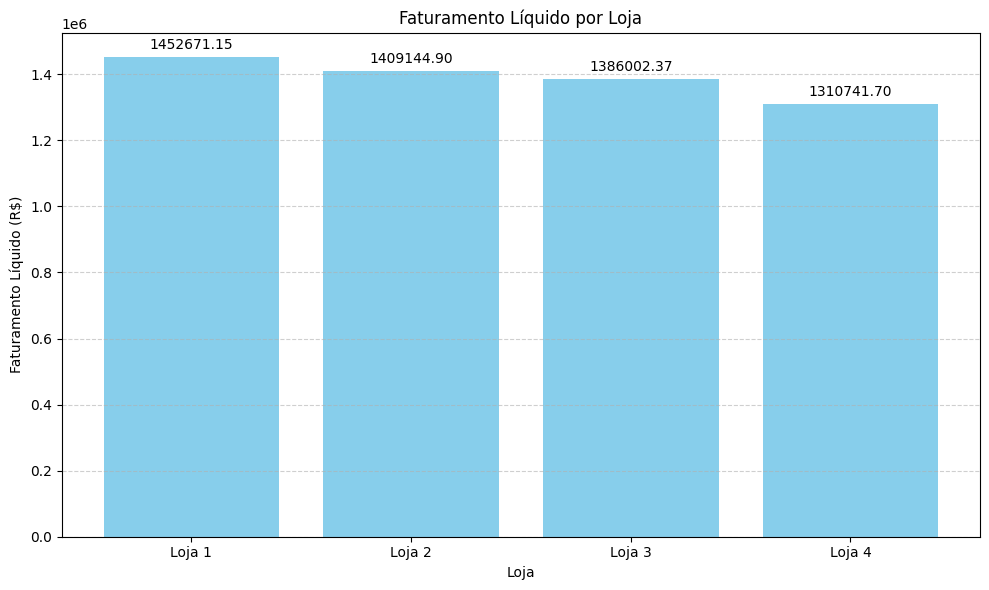

In [8]:
lojas = faturamento_total['Loja']
liquidos = faturamento_total['Preço Líquido']
x = np.arange(len(lojas))

plt.figure(figsize=(10, 6))
bars = plt.bar(x, liquidos, color='skyblue')

for i in range(len(lojas)):
    plt.text(
        x[i],
        liquidos[i] + max(liquidos)*0.01,
        f'{liquidos[i]:.2f}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.xticks(x, lojas)
plt.xlabel('Loja')
plt.ylabel('Faturamento Líquido (R$)')
plt.title('Faturamento Líquido por Loja')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 2. Vendas por Categoria


In [9]:
categoria_stats = df_total.groupby(['Categoria do Produto', 'Loja']).agg(
    Quantidade=('Produto', 'count'),
    Valor_Total=('Preço', 'sum')
).reset_index()

categoria_stats['Valor_Total'] = categoria_stats['Valor_Total'].round(2)

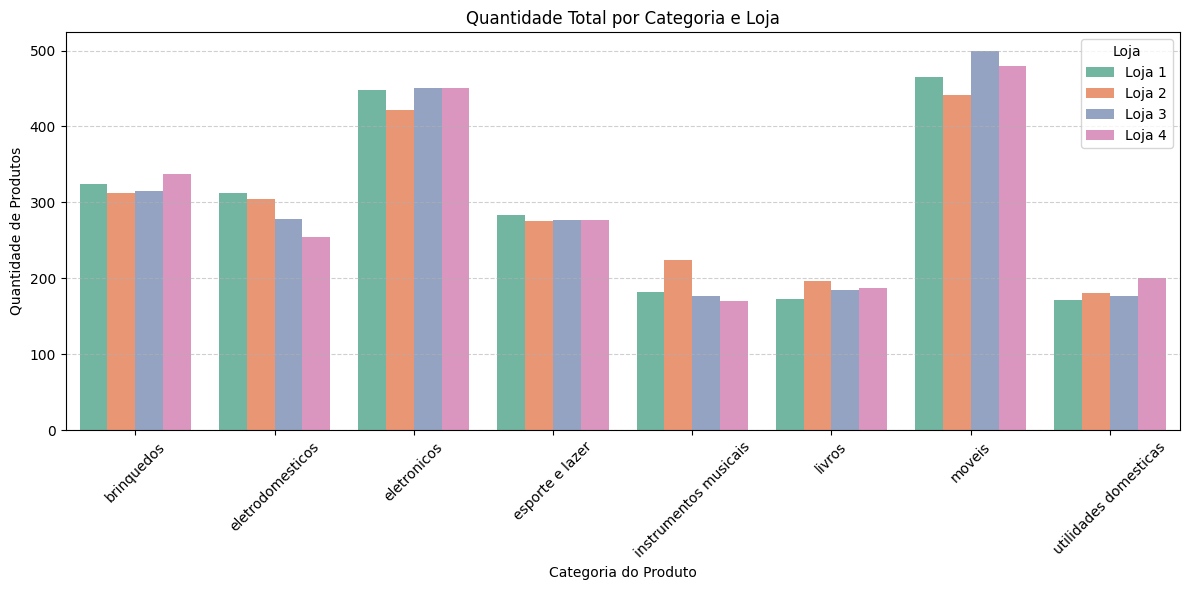

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=categoria_stats,
    x='Categoria do Produto',
    y='Quantidade',
    hue='Loja',
    palette='Set2'
)

plt.title('Quantidade Total por Categoria e Loja')
plt.xlabel('Categoria do Produto')
plt.ylabel('Quantidade de Produtos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend(title='Loja')
plt.show()

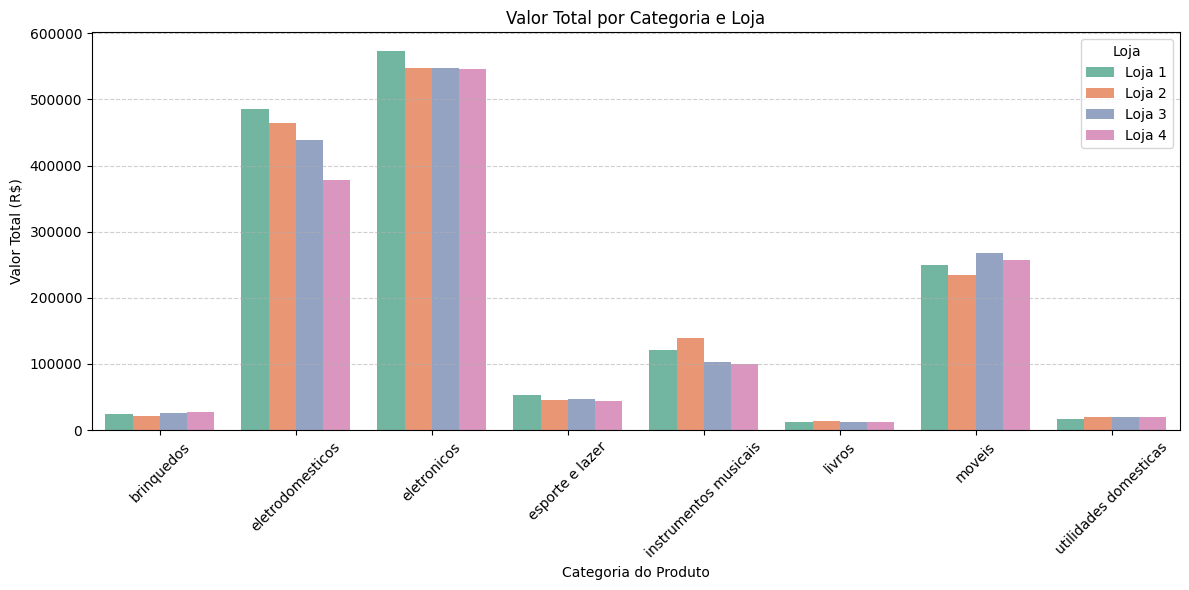

In [11]:
categoria_stats.rename(columns={'Preço': 'Valor_Total'}, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=categoria_stats,
    x='Categoria do Produto',
    y='Valor_Total',
    hue='Loja',
    palette='Set2'
)

plt.title('Valor Total por Categoria e Loja')
plt.xlabel('Categoria do Produto')
plt.ylabel('Valor Total (R$)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.legend(title='Loja')
plt.show()

# 3. Média de Avaliação das Lojas

In [12]:
media_avaliacoes = df_total.groupby('Loja')['Avaliação da compra'].mean().round(2).reset_index()
media_avaliacoes.columns = ['Loja', 'Média de Avaliação']

media_avaliacoes = media_avaliacoes.sort_values(by='Média de Avaliação', ascending=True)

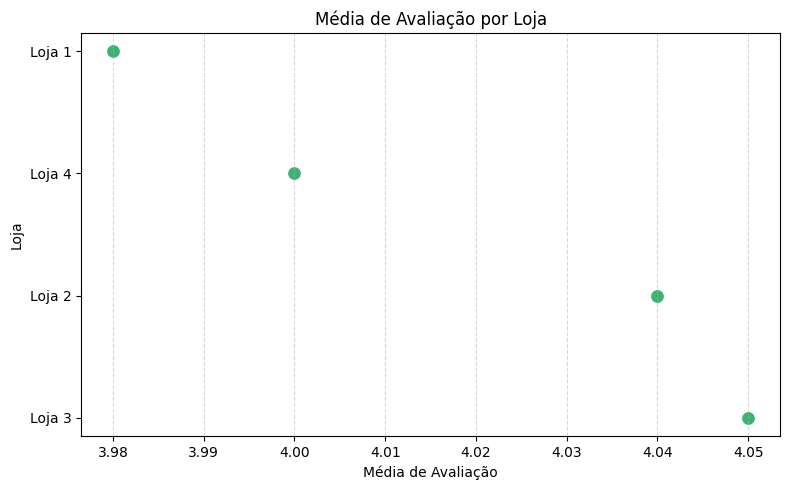

In [13]:
# Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=media_avaliacoes,
    x='Média de Avaliação',
    y='Loja',
    s=100,
    color='mediumseagreen'
)

# Estética
plt.title('Média de Avaliação por Loja')
plt.xlabel('Média de Avaliação')
plt.ylabel('Loja')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 4. Produtos Mais e Menos Vendidos

In [14]:
produto_stats = df_total.groupby(['Produto', 'Loja']).agg(
    Quantidade=('Produto', 'count'),
    Valor_Total=('Preço', 'sum')
).reset_index()

In [15]:
mais_vendidos = (
    produto_stats.loc[produto_stats.groupby('Loja')['Quantidade'].idxmax()]
)
mais_vendidos['Tipo'] = 'Mais Vendido'

In [16]:
menos_vendidos = (
  produto_stats.loc[produto_stats.groupby('Loja')['Quantidade'].idxmin()]
)
menos_vendidos['Tipo'] = 'Menos Vendido'

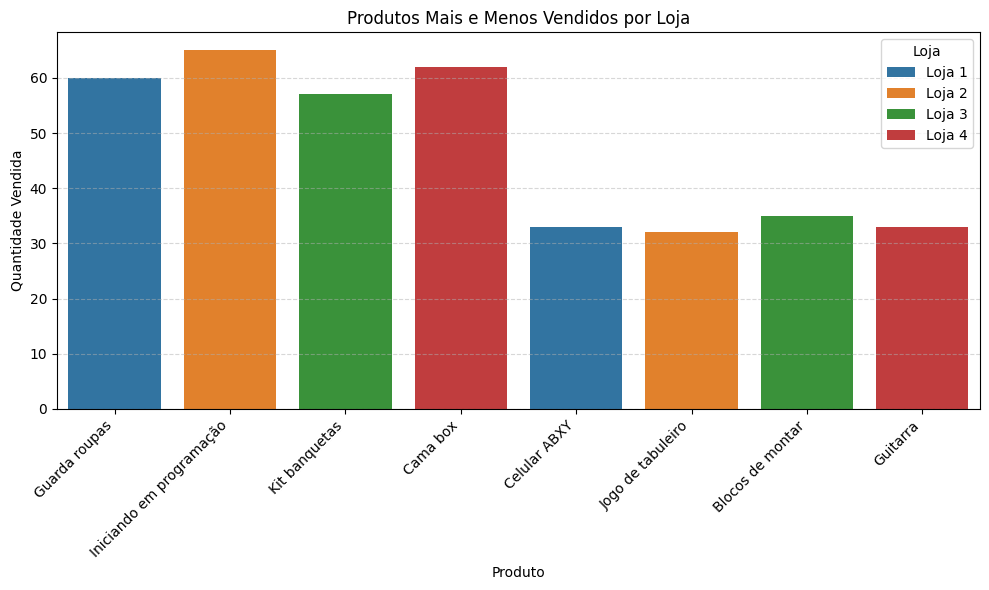

In [17]:
# Concatenar para o gráfico
dados_plot = pd.concat([mais_vendidos, menos_vendidos])
dados_plot['Tipo'] = ['Mais Vendido'] * len(mais_vendidos) + ['Menos Vendido'] * len(menos_vendidos)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=dados_plot,
    x='Produto',
    y='Quantidade',
    hue='Loja',
    palette='tab10'
)

plt.title('Produtos Mais e Menos Vendidos por Loja')
plt.ylabel('Quantidade Vendida')
plt.xlabel('Produto')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.legend(title='Loja')
plt.show()

# 5. Frete Médio por Loja


In [18]:
frete_medio = df_total.groupby('Loja')['Frete'].mean().round(2).reset_index()
frete_medio.columns = ['Loja', 'Frete Médio']

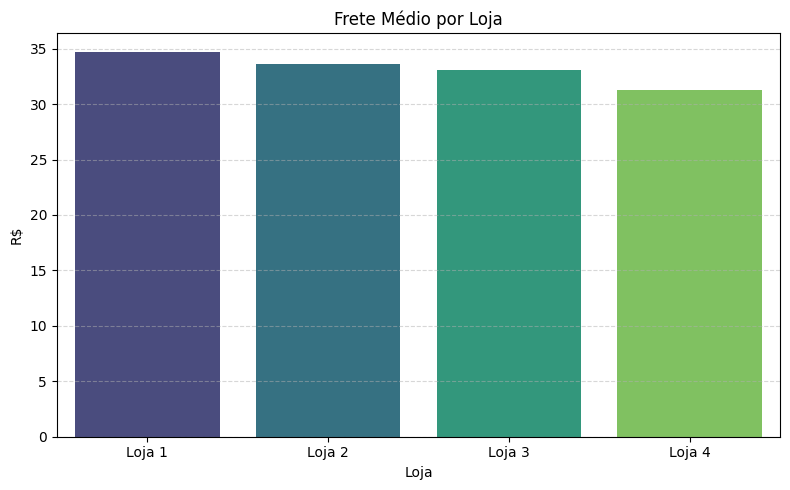

In [19]:
plt.figure(figsize=(8, 5))
sns.barplot(data=frete_medio, x='Loja', y='Frete Médio', palette='viridis', hue='Loja', legend=False)

plt.title('Frete Médio por Loja')
plt.ylabel('R$')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()